# Imports

In [670]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import metrics as m

#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#import pydotplus

from collections import Counter
#from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule

%matplotlib inline

# Constants

In [671]:
dsRed = pd.read_csv("winequality-red.csv",';')
dsWhite = pd.read_csv("winequality-white.csv", ';')

print(dsRed.shape)
print(dsWhite.shape)

(1599, 12)
(4898, 12)


# Data Inspect

In [672]:
print(dsRed.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [673]:
print(dsWhite.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

# Null Check Red

In [674]:
print(dsRed.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [675]:
dsRed = dsRed.dropna() 
print (dsRed.count())
print (dsRed.shape)

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64
(1599, 12)


# null check White

In [676]:
print(dsWhite.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [677]:
dsWhite = dsWhite.dropna() 
print (dsWhite.count())
print (dsWhite.shape)

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64
(4898, 12)


In [678]:
duplicates = dsRed[dsRed.duplicated()]
print (duplicates.shape)

dsRed = dsRed.drop_duplicates()
dsRed.count()

(240, 12)


fixed acidity           1359
volatile acidity        1359
citric acid             1359
residual sugar          1359
chlorides               1359
free sulfur dioxide     1359
total sulfur dioxide    1359
density                 1359
pH                      1359
sulphates               1359
alcohol                 1359
quality                 1359
dtype: int64

In [679]:
duplicates = dsWhite[dsWhite.duplicated()]
print (duplicates.shape)

dsWhite = dsWhite.drop_duplicates()
dsWhite.count()

(937, 12)


fixed acidity           3961
volatile acidity        3961
citric acid             3961
residual sugar          3961
chlorides               3961
free sulfur dioxide     3961
total sulfur dioxide    3961
density                 3961
pH                      3961
sulphates               3961
alcohol                 3961
quality                 3961
dtype: int64

# Red Heatmap

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

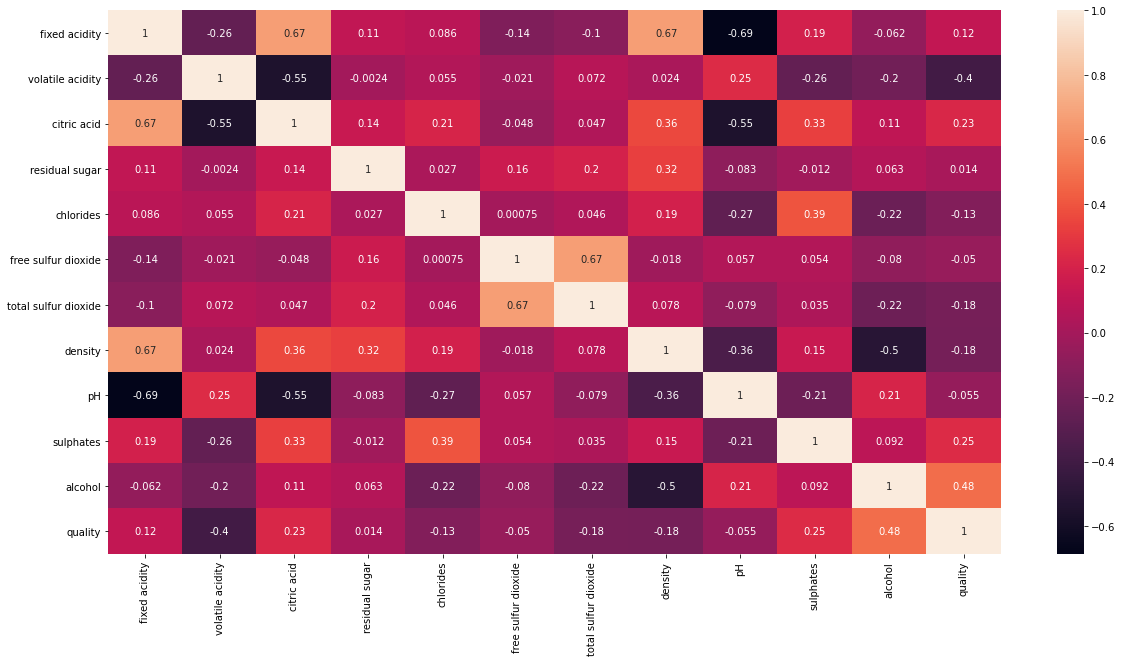

In [680]:
plt.figure(figsize=(20,10))
corl= dsRed.corr()
sb.heatmap(corl,annot=True)
print (corl)

# White Heatmap

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.019214     0.298959   
volatile acidity          -0.019214          1.000000    -0.163228   
citric acid                0.298959         -0.163228     1.000000   
residual sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free sulfur dioxide       -0.058396         -0.102471     0.091681   
total sulfur dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
quality                   -0.124636         -0.190678     0.007065   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

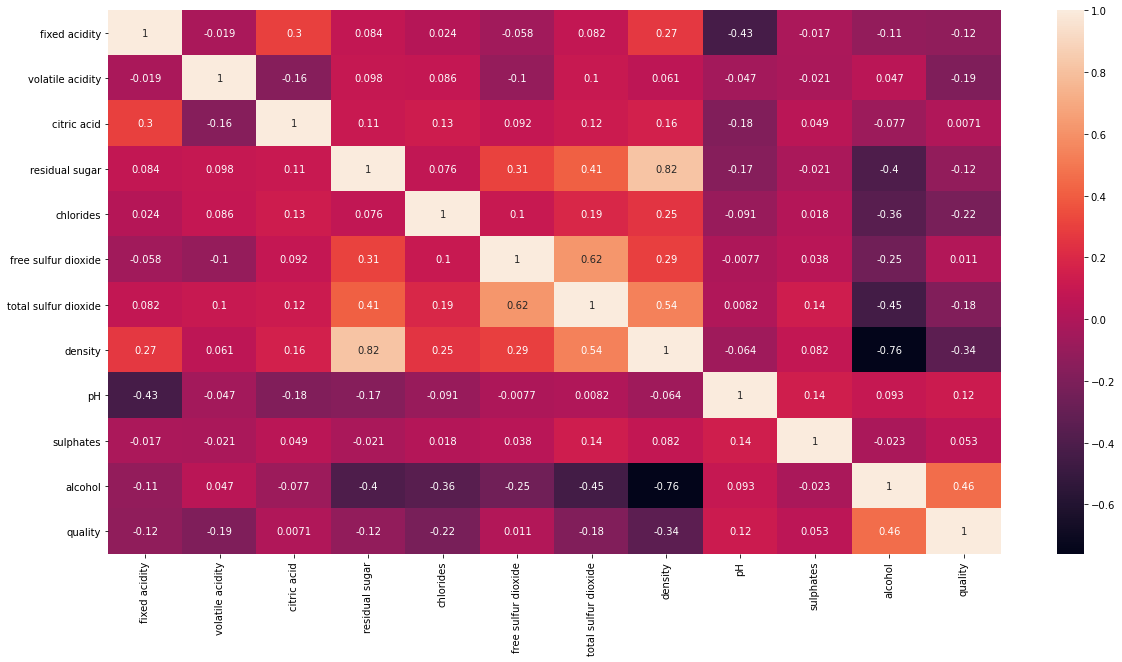

In [681]:
plt.figure(figsize=(20,10))
corl= dsWhite.corr()
sb.heatmap(corl,annot=True)
print (corl)

# Red Process

In [682]:
yr = dsRed.quality.values
xr = dsRed.drop(['quality'], axis=1)

#oss = OneSidedSelection(random_state = 42)
#x,y = oss.fit_resample(x,y)

ncr = NeighbourhoodCleaningRule()
xr, yr = ncr.fit_resample(xr, yr)

Counter(yr)
Counter(xr)
print (xr.shape)

(621, 11)


# White Process

In [683]:
yw = dsWhite.quality.values
xw = dsWhite.drop(['quality'], axis=1)

ncr = NeighbourhoodCleaningRule()
xw, yw = ncr.fit_resample(xw, yw)

Counter(yw)
Counter(xw)
print (xw.shape)

(1577, 11)


# Red Wine Train

In [684]:
x_train, x_test, y_train, y_test = tts(xr, yr, test_size=0.10, random_state=1) 

print (x_train.shape)

(558, 11)


In [685]:
classifier = dtc(max_depth=3)

classifier = classifier.fit(x_train,y_train)

In [686]:
print (x_test.shape)
yPredictTrain = classifier.predict(x_test)

print("Accuracy:",m.accuracy_score(y_test, yPredictTrain))

(63, 11)
Accuracy: 0.6984126984126984


# White Wine Test

In [687]:
print (xw.shape)
yPredictTest = classifier.predict(xw)

print("Accuracy:",m.accuracy_score(yw, yPredictTest))

(1577, 11)
Accuracy: 0.6074825618262524
